### SSR greedy algorithm
Stepwise sparse regression (SSR) solves the problem by iteratively truncating off the smallest coefficient during the optimization. There are many ways one can decide to truncate terms. We implement two popular ways, truncating the smallest coefficient at each iteration, or chopping each coefficient, computing N - 1 models, and then choosing the model with the lowest residual error. 

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import odeint
from sklearn.linear_model import Lasso
import pysindy as ps

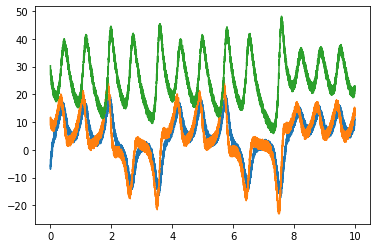

In [2]:
def lorenz(z, t):
    return [
        10 * (z[1] - z[0]),
        z[0] * (28 - z[2]) - z[1],
        z[0] * z[1] - (8 / 3) * z[2]
    ]

dt = .002
t_train = np.arange(0, 10, dt)
x0_train = [-8, 8, 27]
x_train = odeint(lorenz, x0_train, t_train)
x_train = x_train + np.random.rand(x_train.shape[0], 3) * 4
ssr_optimizer = ps.SSR(alpha=.05)

model = ps.SINDy(optimizer=ssr_optimizer)
model.fit(x_train, t=dt)

for i in range(3):
    plt.plot(t_train, x_train[:, i])

Note the usage is a bit different because we save all the sparse models and we choose our favorite one afterwards. Below we show Model 4 has the lowest MSE between the predicted and true derivative, so we could use this to choose our model. 

Model 0, MSE: 765.765012
Model 1, MSE: 766.512111
Model 2, MSE: 792.299966
Model 3, MSE: 700.470165
Model 4, MSE: 742.936885
Model 5, MSE: 681.627158
Model 6, MSE: 3052.934280
Model 7, MSE: 3051.980863


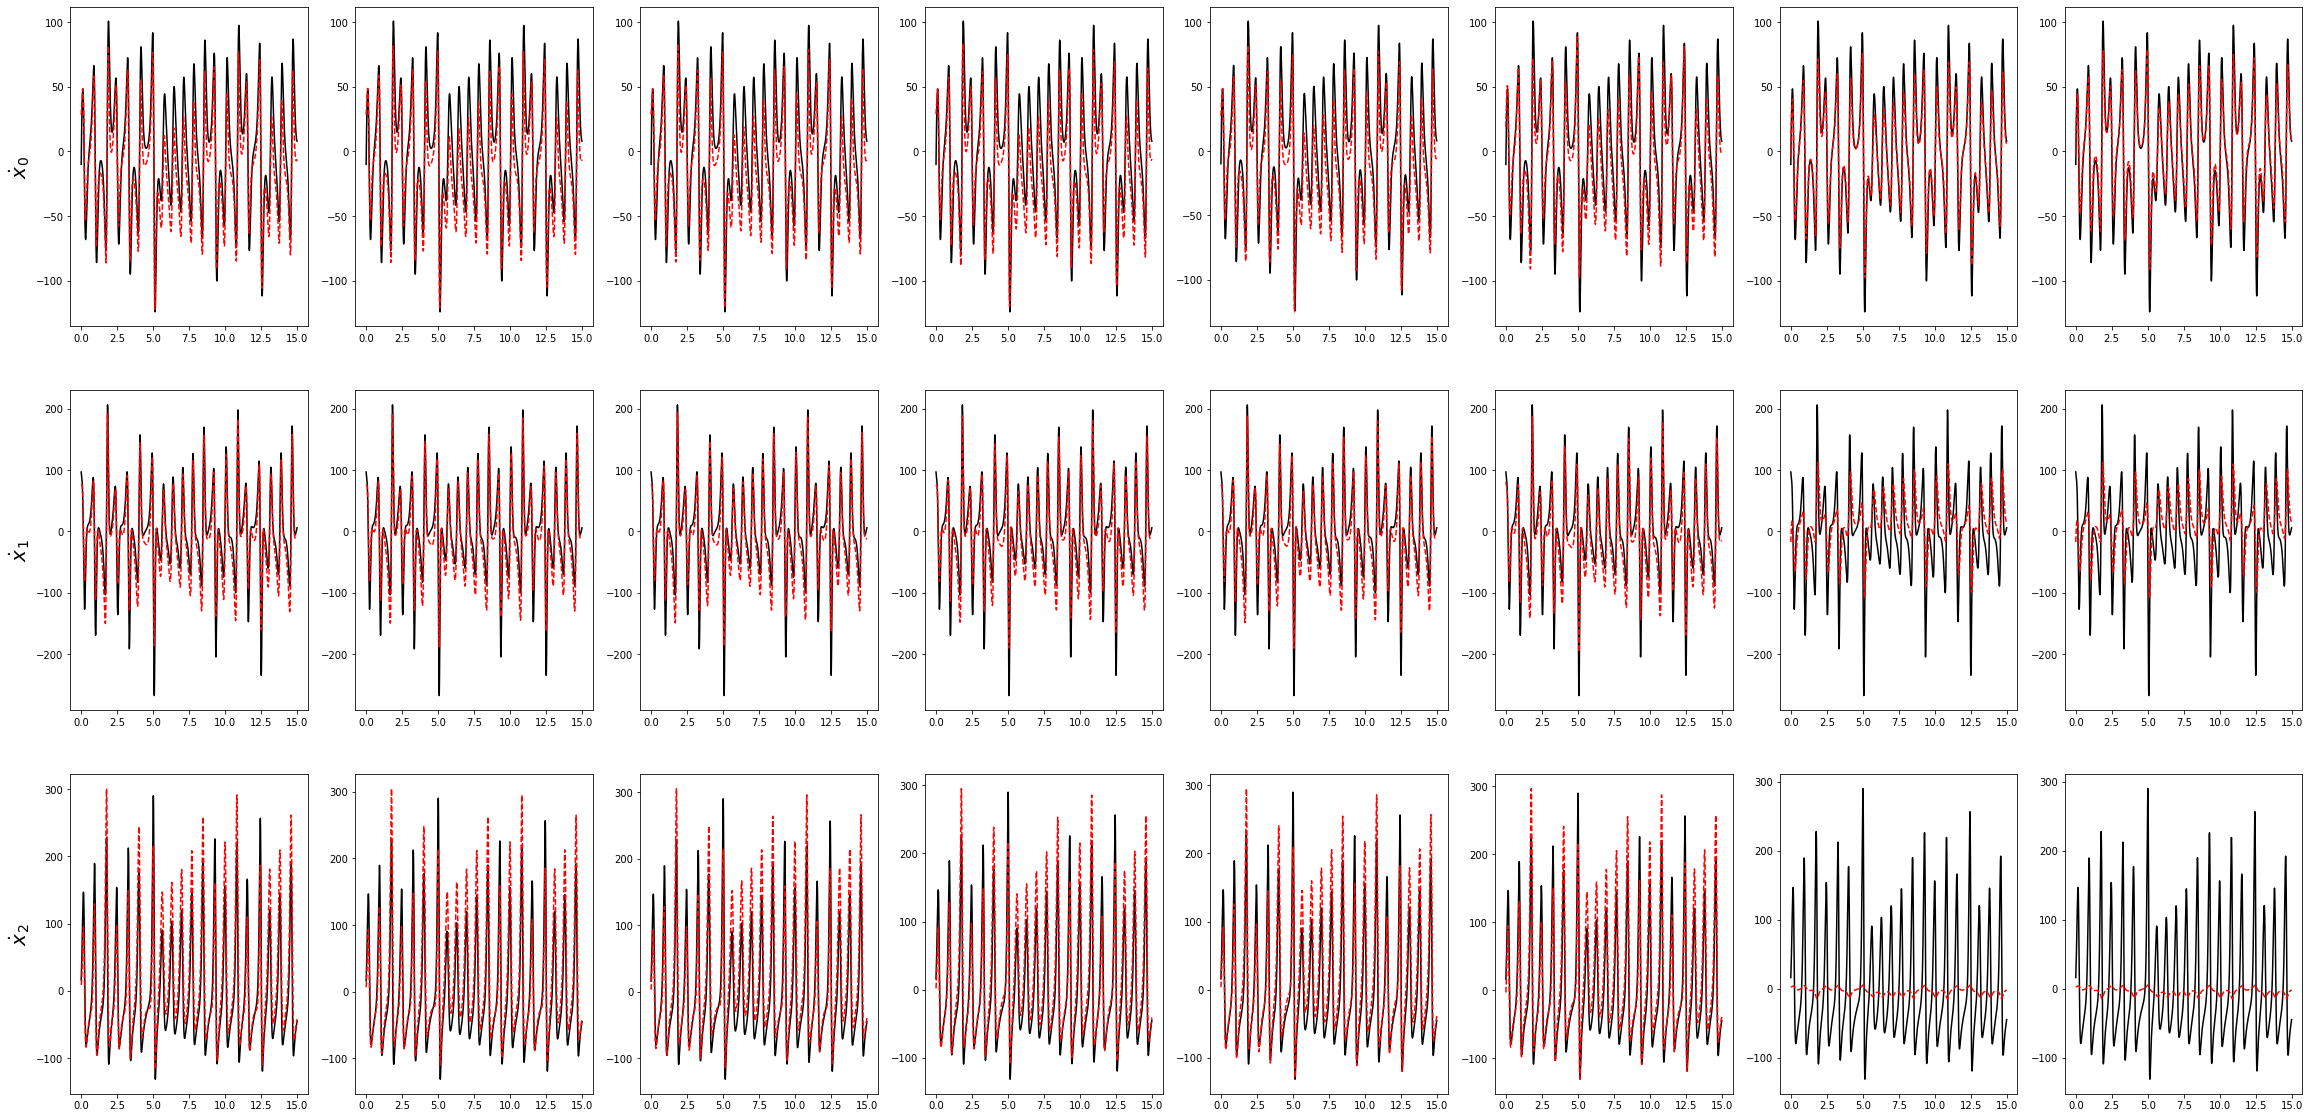

In [3]:
from sklearn.metrics import mean_squared_error

# Evolve the Lorenz equations in time using a different initial condition
t_test = np.arange(0, 15, dt)
x0_test = np.array([8, 7, 15])
x_test = odeint(lorenz, x0_test, t_test)  

plt.figure(figsize=(40, 20))
for j in range(np.shape(ssr_optimizer.history_)[0]):
    ssr_optimizer.coef_ = np.asarray(ssr_optimizer.history_)[j, :, :]
    
    # Predict derivatives using the learned model
    x_dot_test_predicted = model.predict(x_test)  

    # Compute derivatives with a finite difference method, for comparison
    x_dot_test_computed = model.differentiate(x_test, t=dt)

    for i in range(x_test.shape[1]):
        plt.subplot(np.shape(x_test)[1], np.shape(ssr_optimizer.history_)[0], 
                    i * np.shape(ssr_optimizer.history_)[0] + j + 1)
        plt.plot(t_test, x_dot_test_computed[:, i],
                    'k', label='numerical derivative')
        plt.plot(t_test, x_dot_test_predicted[:, i],
                    'r--', label='model prediction')
        if j == 0:
            plt.ylabel('$\dot x_{}$'.format(i), fontsize=20)
            
    print('Model ' + str(j) + ', MSE: %f' % model.score(x_test, t=dt, metric=mean_squared_error))

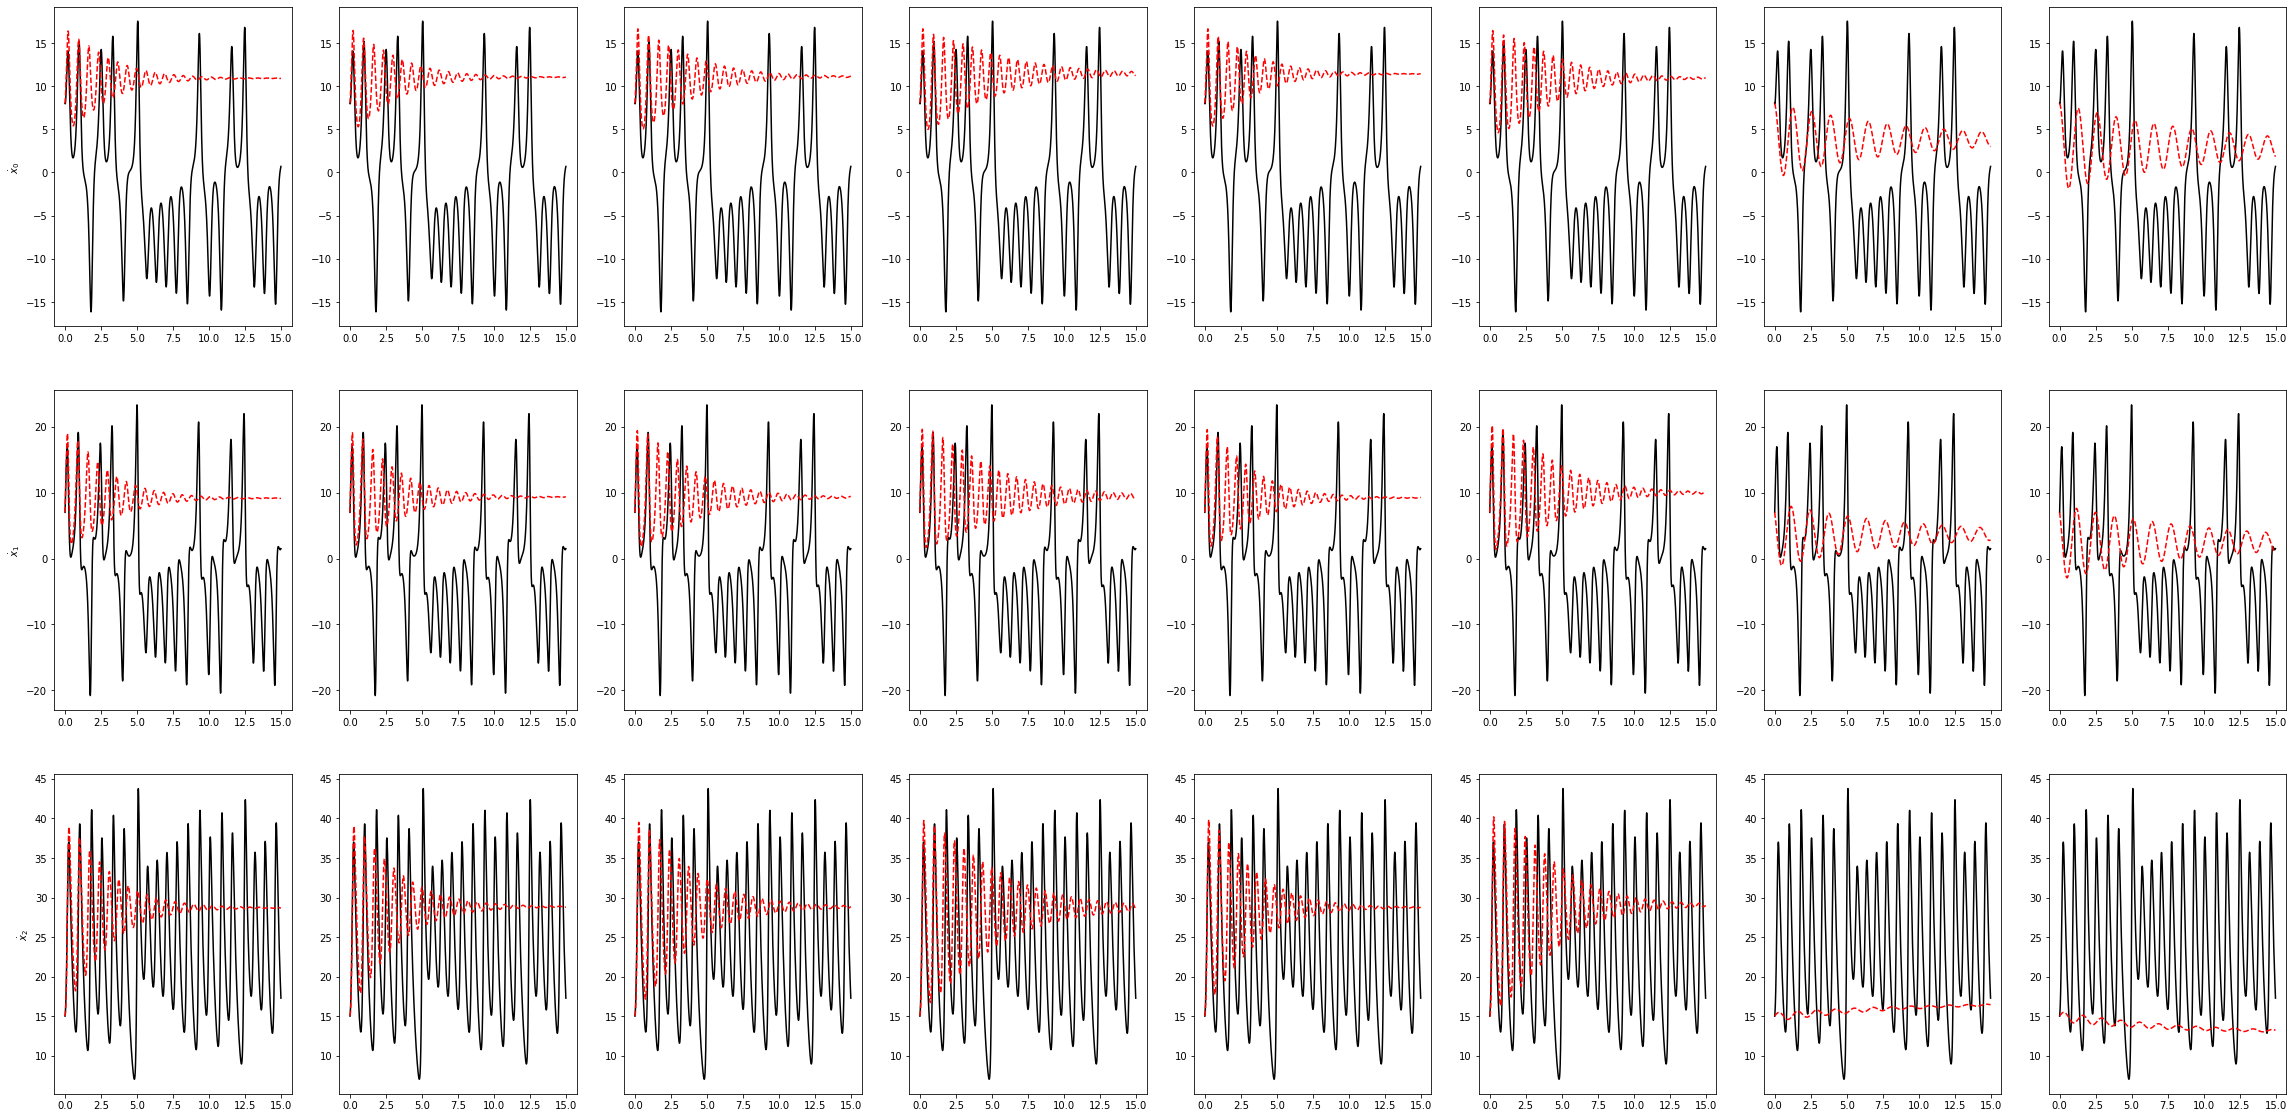

In [4]:
plt.figure(figsize=(40, 20))
for j in range(np.shape(ssr_optimizer.history_)[0]):
    ssr_optimizer.coef_ = np.asarray(ssr_optimizer.history_)[j, :, :]
    
    x_test_sim = model.simulate(x0_test, t_test)

    for i in range(x_test.shape[1]):
        plt.subplot(np.shape(x_test)[1], np.shape(ssr_optimizer.history_)[0], 
                    i * np.shape(ssr_optimizer.history_)[0] + j + 1)
        plt.plot(t_test, x_test[:, i],
                    'k', label='numerical derivative')
        plt.plot(t_test, x_test_sim[:, i],
                    'r--', label='model prediction')  
        if j == 0:
            plt.ylabel('$\dot x_{}$'.format(i))

# Repeat the exercise with the lowest model residual method

In [5]:
ssr_optimizer = ps.SSR(alpha=.05, criteria="model_residual")
model = ps.SINDy(optimizer=ssr_optimizer)
model.fit(x_train, t=dt)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['x0', 'x1', 'x2'],
      optimizer=SSR(criteria='model_residual'))

Model 0, MSE: 765.765012
Model 1, MSE: 747.983055
Model 2, MSE: 766.654326
Model 3, MSE: 751.050643
Model 4, MSE: 737.275320
Model 5, MSE: 857.097253
Model 6, MSE: 752.057527
Model 7, MSE: 723.309914


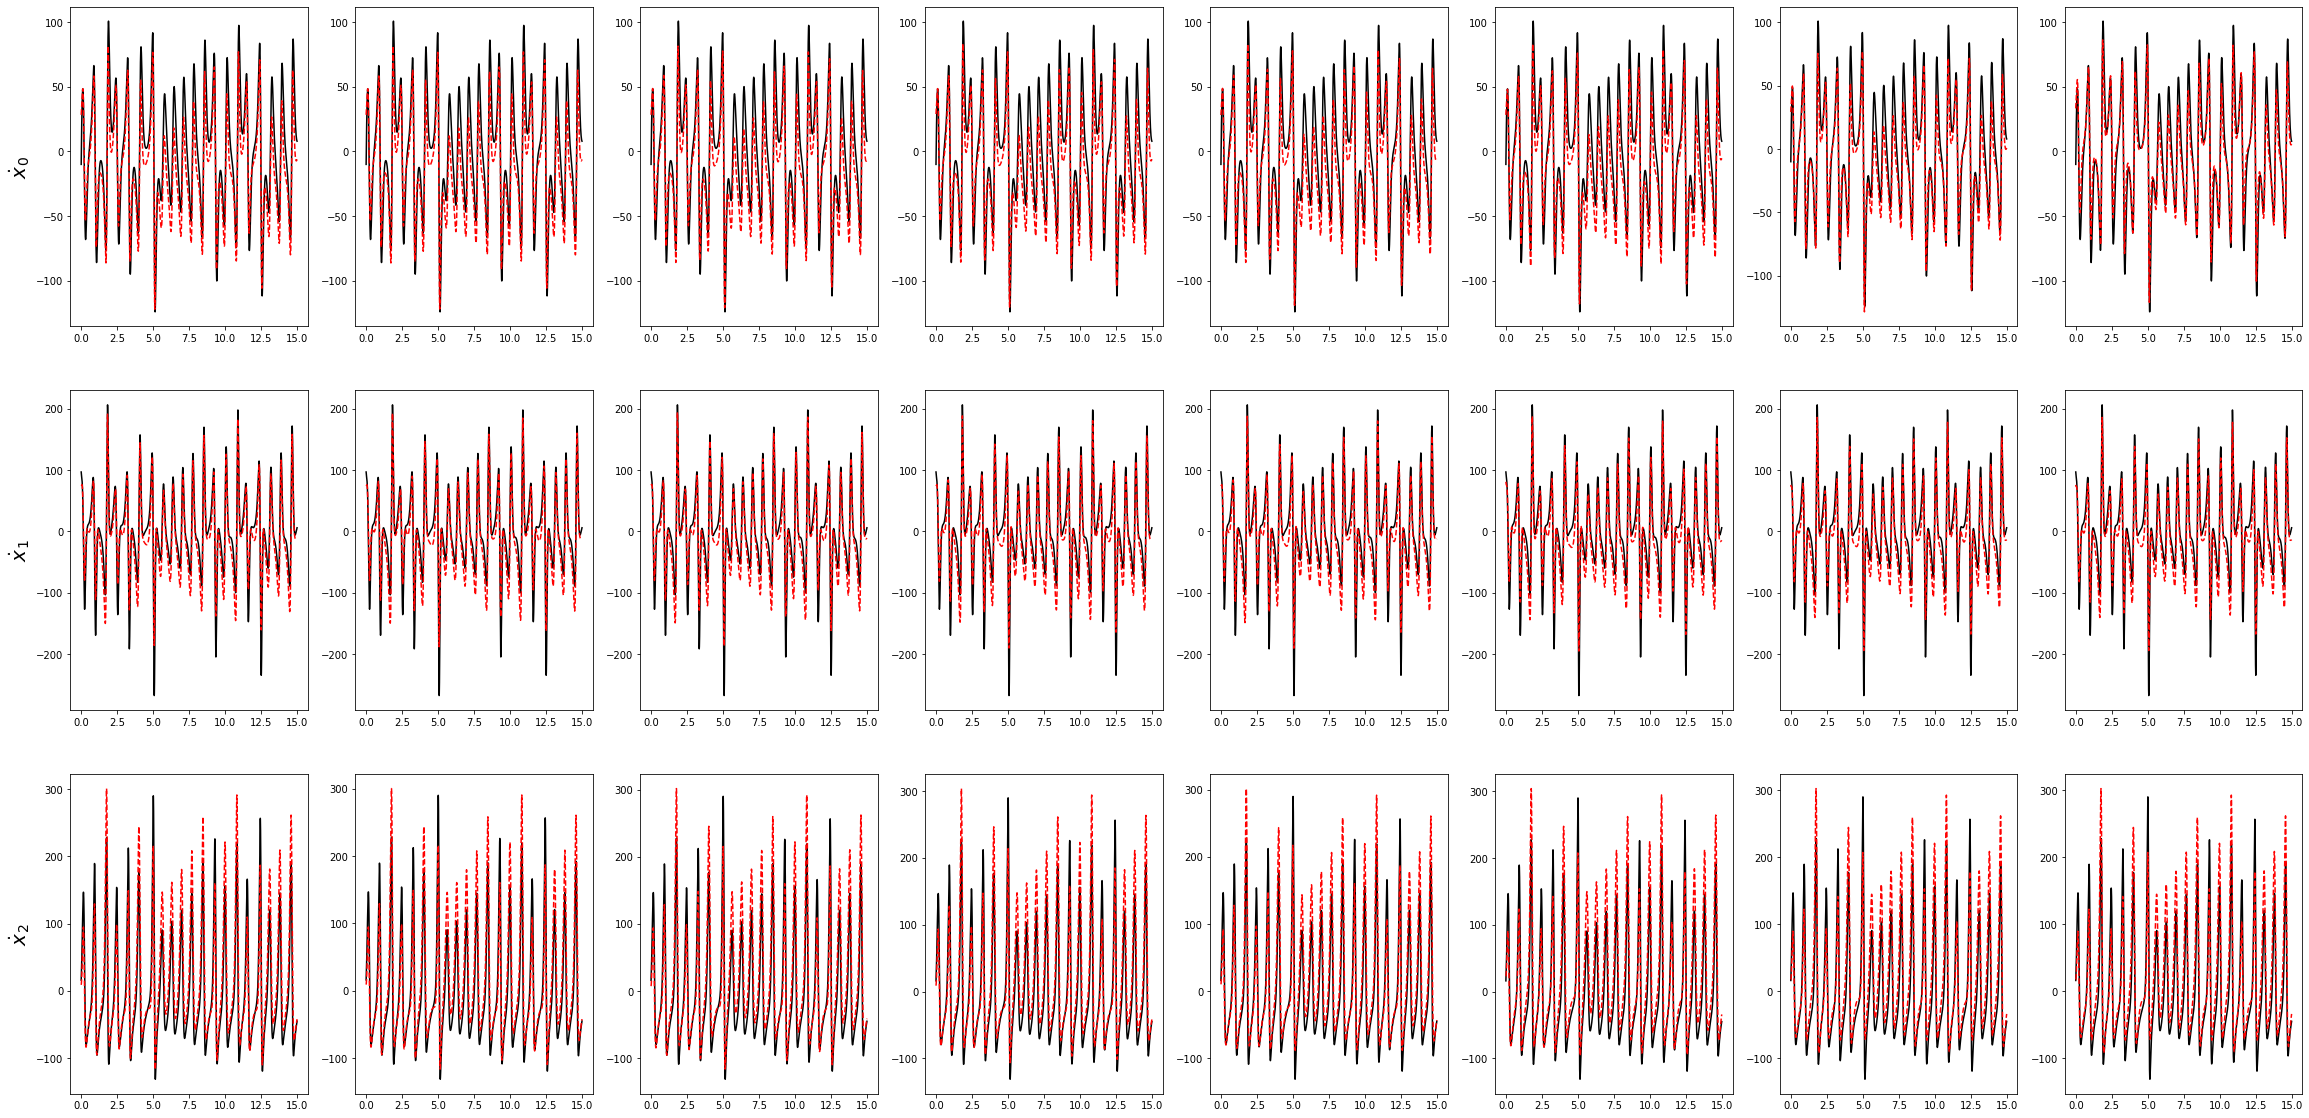

In [6]:
plt.figure(figsize=(40, 20))
for j in range(np.shape(ssr_optimizer.history_)[0]):
    ssr_optimizer.coef_ = np.asarray(ssr_optimizer.history_)[j, :, :]
    
    # Predict derivatives using the learned model
    x_dot_test_predicted = model.predict(x_test)  

    # Compute derivatives with a finite difference method, for comparison
    x_dot_test_computed = model.differentiate(x_test, t=dt)

    for i in range(x_test.shape[1]):
        plt.subplot(np.shape(x_test)[1], np.shape(ssr_optimizer.history_)[0], 
                    i * np.shape(ssr_optimizer.history_)[0] + j + 1)
        plt.plot(t_test, x_dot_test_computed[:, i],
                    'k', label='numerical derivative')
        plt.plot(t_test, x_dot_test_predicted[:, i],
                    'r--', label='model prediction')
        if j == 0:
            plt.ylabel('$\dot x_{}$'.format(i), fontsize=20)
            
    print('Model ' + str(j) + ', MSE: %f' % model.score(x_test, t=dt, metric=mean_squared_error))

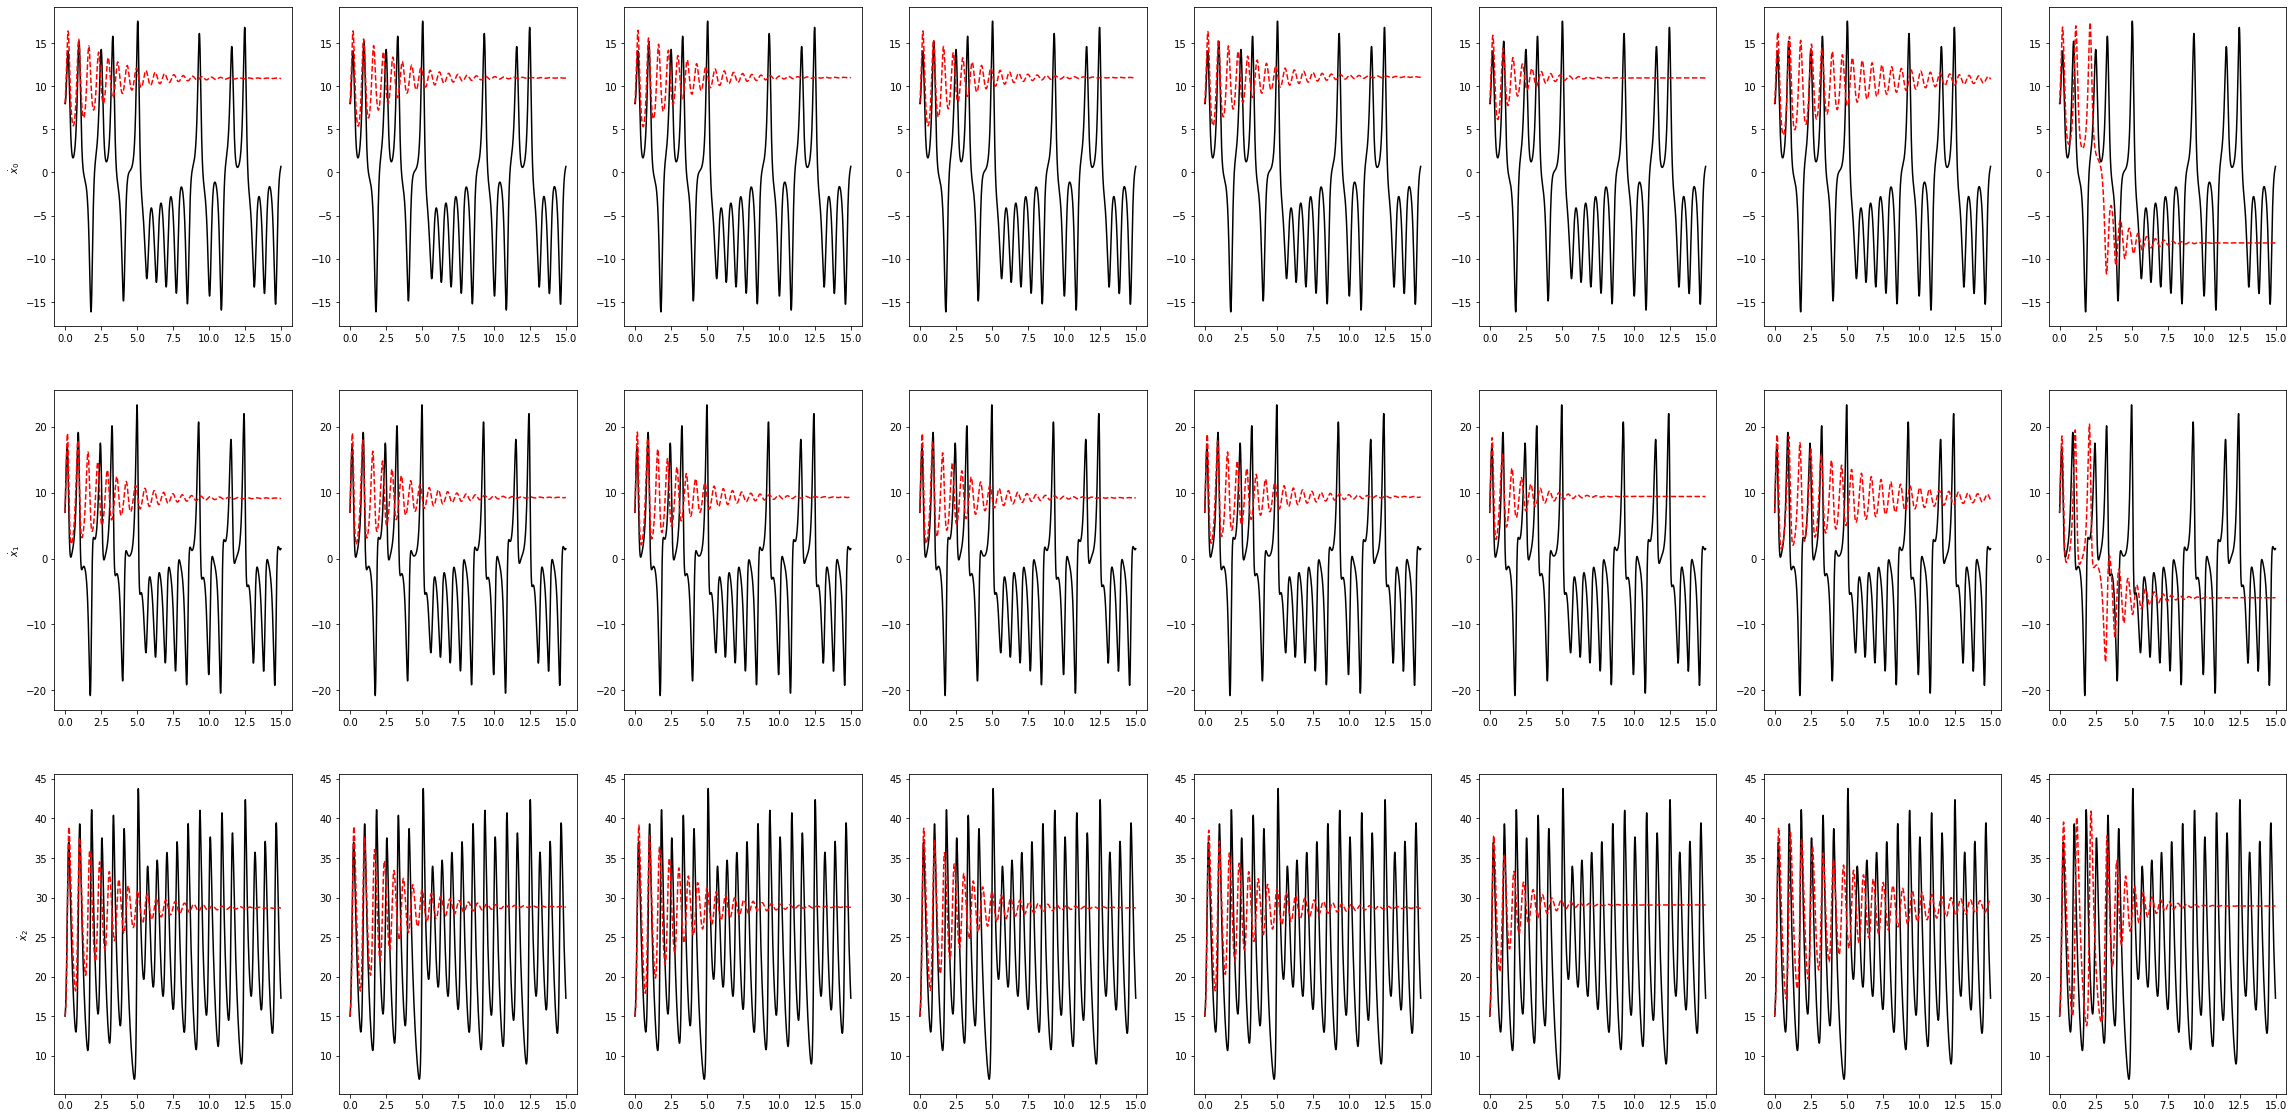

In [7]:
plt.figure(figsize=(40, 20))
for j in range(np.shape(ssr_optimizer.history_)[0]):
    ssr_optimizer.coef_ = np.asarray(ssr_optimizer.history_)[j, :, :]
    
    x_test_sim = model.simulate(x0_test, t_test)

    for i in range(x_test.shape[1]):
        plt.subplot(np.shape(x_test)[1], np.shape(ssr_optimizer.history_)[0], 
                    i * np.shape(ssr_optimizer.history_)[0] + j + 1)
        plt.plot(t_test, x_test[:, i],
                    'k', label='numerical derivative')
        plt.plot(t_test, x_test_sim[:, i],
                    'r--', label='model prediction')  
        if j == 0:
            plt.ylabel('$\dot x_{}$'.format(i))

# FROLS greedy algorithm
Forward Regression Orthogonal Least Squares (FROLS) solves the least-squares regression problem with $L_0$ norm by iteratively selecting the most correlated function in the library. At each step, the candidate functions are orthogonalized with respect to the already-selected functions. The selection criteria is the Error Reduction Ratio, i.e. the normalized increase in the explained output variance due to the addition of a given function to the basis.

In [8]:
dt = .002
t_train = np.arange(0, 10, dt)
x0_train = [-8, 8, 27]
x_train = odeint(lorenz, x0_train, t_train)
x_train = x_train  #+ np.random.rand(x_train.shape[0], 3) * 4
# Evolve the Lorenz equations in time using a different initial condition
t_test = np.arange(0, 15, dt)
x0_test = np.array([8, 7, 15])
x_test = odeint(lorenz, x0_test, t_test)  

frols_optimizer = ps.FROLS(kappa=1e-8)

model = ps.SINDy(optimizer=frols_optimizer)
model.fit(x_train, t=dt)
model.print()

x0' = -9.999 x0 + 9.999 x1
x1' = 27.992 x0 + -0.999 x1 + -1.000 x0 x2
x2' = -2.666 x2 + 1.000 x0 x1


Model 7, MSE: 0.000072


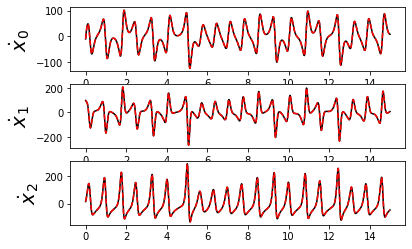

In [9]:
# Predict derivatives using the learned model
x_dot_test_predicted = model.predict(x_test)  

# Compute derivatives with a finite difference method, for comparison
x_dot_test_computed = model.differentiate(x_test, t=dt)

for i in range(x_test.shape[1]):
    plt.subplot(np.shape(x_test)[1], 1, i+1)
    plt.plot(t_test, x_dot_test_computed[:, i],
                'k', label='numerical derivative')
    plt.plot(t_test, x_dot_test_predicted[:, i],
                'r--', label='model prediction')
    plt.ylabel('$\dot x_{}$'.format(i), fontsize=20)

print('Model ' + str(j) + ', MSE: %f' % model.score(x_test, t=dt, metric=mean_squared_error))

Model 7, MSE: 0.000072


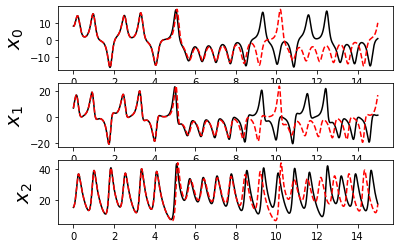

In [10]:
# Predict derivatives using the learned model
x_test_sim = model.simulate(x0_test, t_test)

for i in range(x_test.shape[1]):
    plt.subplot(np.shape(x_test)[1], 1, i+1)
    plt.plot(t_test, x_test[:, i],
                'k', label='numerical derivative')
    plt.plot(t_test, x_test_sim[:, i],
                'r--', label='model prediction')  
    plt.ylabel('$x_{}$'.format(i), fontsize=20)

print('Model ' + str(j) + ', MSE: %f' % model.score(x_test, t=dt, metric=mean_squared_error))

# Let's compare all three methods as the noise steadily increases, cross-validated over 20 noise instantiations

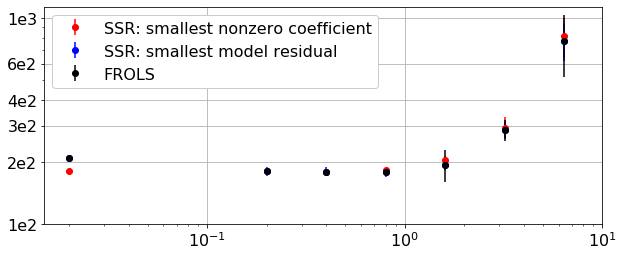

In [11]:
dt = .1
t_train = np.arange(0, 10, dt)
x0_train = [-8, 8, 27]
x_train = odeint(lorenz, x0_train, t_train)
ssr_optimizer = ps.SSR(alpha=.05)
model = ps.SINDy(optimizer=ssr_optimizer)

t_test = np.arange(0, 15, dt)
x0_test = np.array([8, 7, 15])
x_test = odeint(lorenz, x0_test, t_test)  

n_validation = 10
noise_levels = [0.02, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4]
criterias = ["coefficient_value", "model_residual"]
final_MSE = np.zeros((3, len(noise_levels), n_validation))
for k, noise_level in enumerate(noise_levels):
    for i in range(n_validation):
        x_noisy = x_train + np.random.rand(x_train.shape[0], 3) * noise_level
        for kk in range(3): 
            if kk == 0:
                optimizer = ps.SSR(alpha=0, criteria="coefficient_value")
            if kk == 1:
                optimizer = ps.SSR(alpha=0, criteria="model_residual")
            if kk == 2:
                optimizer = ps.FROLS()
            model = ps.SINDy(optimizer=optimizer)
            model.fit(x_noisy, t=dt)
            MSE = np.zeros(np.shape(optimizer.history_)[0])
            for j in range(np.shape(optimizer.history_)[0]):
                optimizer.coef_ = np.asarray(optimizer.history_)[j, :, :]
                MSE[j] = model.score(x_test, t=dt, metric=mean_squared_error)
            final_MSE[kk, k, i] = np.min(MSE)
            
average_MSE_cross_validated = np.mean(final_MSE, axis=-1)
std_MSE_cross_validated = np.std(final_MSE, axis=-1)
plt.figure(figsize=(10, 4))
plt.errorbar(noise_levels, average_MSE_cross_validated[0, :], 
             yerr=std_MSE_cross_validated[0, :], fmt='o', color='r', 
             label='SSR: smallest nonzero coefficient')
plt.errorbar(noise_levels, average_MSE_cross_validated[1, :], 
             yerr=std_MSE_cross_validated[1, :], fmt='o', color='b',
             label='SSR: smallest model residual')
plt.errorbar(noise_levels, average_MSE_cross_validated[1, :], 
             yerr=std_MSE_cross_validated[2, :], fmt='o', color='k',
             label='FROLS')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=16, loc='upper left', framealpha=1.0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
ax = plt.gca()
ax.set_xticks([0.1, 1.0, 10])
ax.set_yticks([1e2, 2e2, 3e2, 4e2, 6e2, 10e2])
ax.set_yticklabels(['1e2', '2e2', '3e2', '4e2', '6e2', '1e3'])
plt.savefig('SSR_FROLS_comparison.pdf')